# This is Boston

<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


### Introduction

Welcome to Boston Massachusetts in the 1970s! Imagine you're working for a real estate development company. Your company wants to value any residential project before they start. You are tasked with building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

<img src=https://i.imgur.com/WfUSSP7.png height=350>

To accomplish your task you will:

1. Analyse and explore the Boston house price data
2. Split your data for training and testing
3. Run a Multivariable Regression
4. Evaluate how your model's coefficients and residuals
5. Use data transformation to improve your model performance
6. Use your model to estimate a property price

In [7]:
# %pip install --upgrade plotly

###  Import Statements


In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

# Loading the Data

The first column in the .csv file just has the row numbers, so it will be used as the index. 

In [10]:
data = pd.read_csv('boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


# Preliminary Data Exploration 🔎


In [11]:
# shape of the data
print(f"{data.shape} is the shape of the document")

(506, 14) is the shape of the document


In [12]:
# No of Rows it has
print(f"No of rows: {data.shape[0]}")

No of rows: 506


In [13]:
# No of Columns it has
print(f"No of columns: {data.shape[1]}")

No of columns: 14


In [14]:
# Column Names of the data
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [15]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [16]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00
505,0.05,0.00,11.93,0.00,0.57,6.03,80.80,2.50,1.00,273.00,21.00,396.90,7.88,11.90


In [17]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [18]:
data.isna().sum().sum()

0

In [19]:
data.duplicated().sum().sum()

0

## Data Cleaning

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [21]:
print(f"Is there any NAN values? {data.isna().values.any()}")

Is there any NAN values? False


In [22]:
print(f"Is there any duplicate values? {data.duplicated().values.any()}")

Is there any duplicate values? False


**Comment:**
>No Null values and duplicate ones exists.

## Descriptive Statistics


In [23]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


**Comment:**
>CHAS has only two values 0 and 1, it tells whether the home is near the charles river or not, 1 being the near, it is called the dummy variable.

>The Average price of a boston home was $22,530 in 1970's. We've experienced so much inflation since than, and the prizes of homes appreciated.

## Visualise the Features

#### House Prices 💰

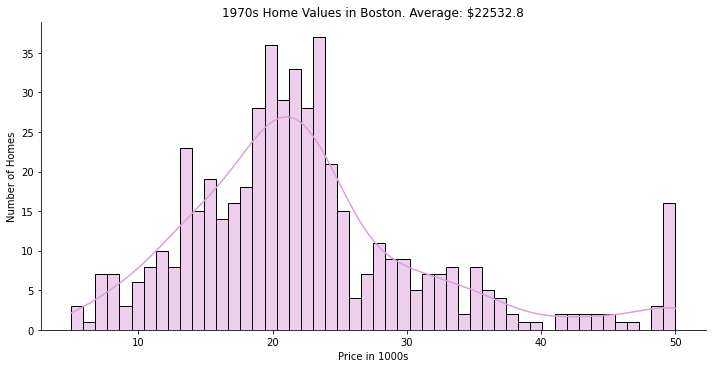

In [24]:
sns.displot(data=data,
            x=data['PRICE'],
            bins=50, 
            kde=True,
            aspect=2,
            color="plum")

plt.title(f"1970s Home Values in Boston. Average: ${(1000*data['PRICE'].mean()):.6}")
plt.xlabel("Price in 1000s")
plt.ylabel("Number of Homes")

plt.show()

**Comment:**
>majority of owner-occupied home's have prices in between $10,000 to $30,000, the most preferred price in $20,000, also it's is normalized curve. And there is also a spike in number of homes at the point of 50,000.

#### Distance to Employment - Length of Commute 🚗

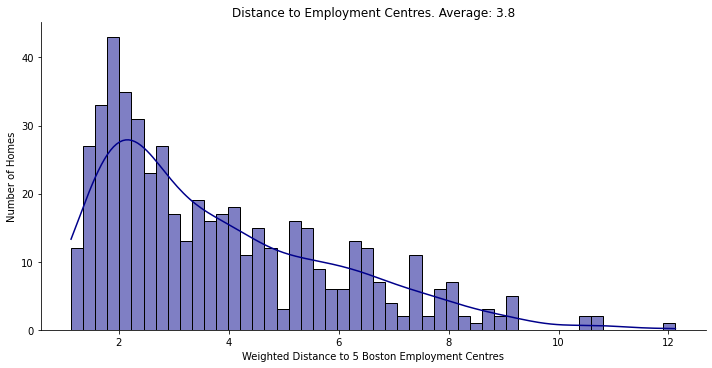

In [25]:
sns.displot(data=data,
            x=data['DIS'],
            kde=True,
            aspect=2,
            bins=50,
            color="darkblue")

plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Number of Homes')

plt.show()

**Comment:**
>So mostly the Length of commute is 3.8 miles and it slides down as less people prefer to travel more for work, mostly prefer 
distances between 2 to 4 miles.

#### Number of Rooms

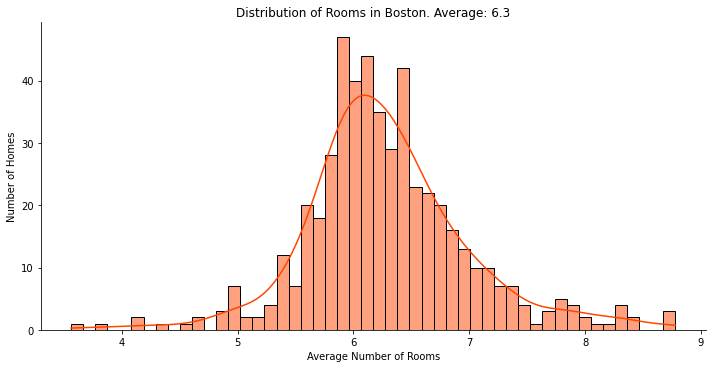

In [26]:
sns.displot(data=data,
            x=data['RM'],
            kde=True,
            aspect=2,
            bins=50,
            color="orangered")

plt.title(f"Distribution of Rooms in Boston. Average: {data['RM'].mean():.2}")
plt.xlabel("Average Number of Rooms")
plt.ylabel("Number of Homes")

plt.show()

**Comment:**
>RM - average number of rooms per dwellings is a measure of crowding that considers all the rooms in a private dwelling and the number of household dwellers, this plot shows that in more than 70 houses has 6.3 rooms per dwellings.

#### Access to Highways 🛣

<Figure size 2000x1000 with 0 Axes>

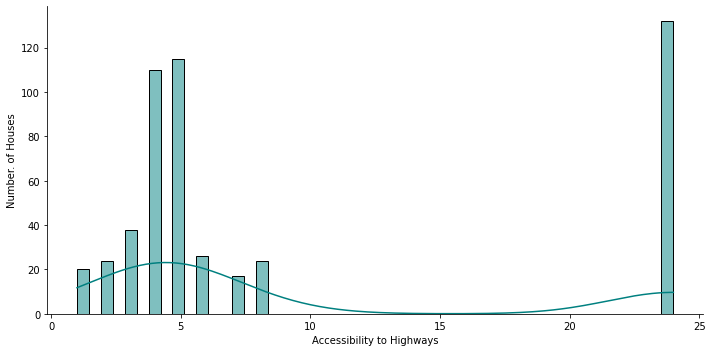

In [27]:
plt.figure(figsize=(10, 5), dpi=200)
sns.displot(data=data,
            x=data['RAD'],
            bins=50,
            kde=True,
            aspect=2,
            color="teal")

plt.xlabel('Accessibility to Highways')
plt.ylabel('Number. of Houses')
plt.show()

**Comment:**
>Obviously, the residential area is often far from highways, that is why the average homes don't have much access to highways, on the other hand, on the other are multiple homes close to highways

#### Next to the River? ⛵️


In [28]:
river_access = data['CHAS'].value_counts()

bar = px.bar(x=['No', 'Yes'],
             y=river_access.values,
             color=river_access.values,
             color_continuous_scale=px.colors.sequential.haline,
             title="Next to Charle's River?")

bar.update_layout(xaxis_title='Property Located Next to the River?', 
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()

We see that out of the total number of 506 homes, only 35 are located next to the Charles River.
<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

### Run a Pair Plot

There might be some relationships in the data that we should know about. Before you run the code, make some predictions:

* What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)? 
* What kind of relationship do you expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices? 

Run a [Seaborn `.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) to visualise all the relationships at the same time. Note, this is a big task and can take 1-2 minutes! After it's finished check your intuition regarding the questions above on the `pairplot`. 

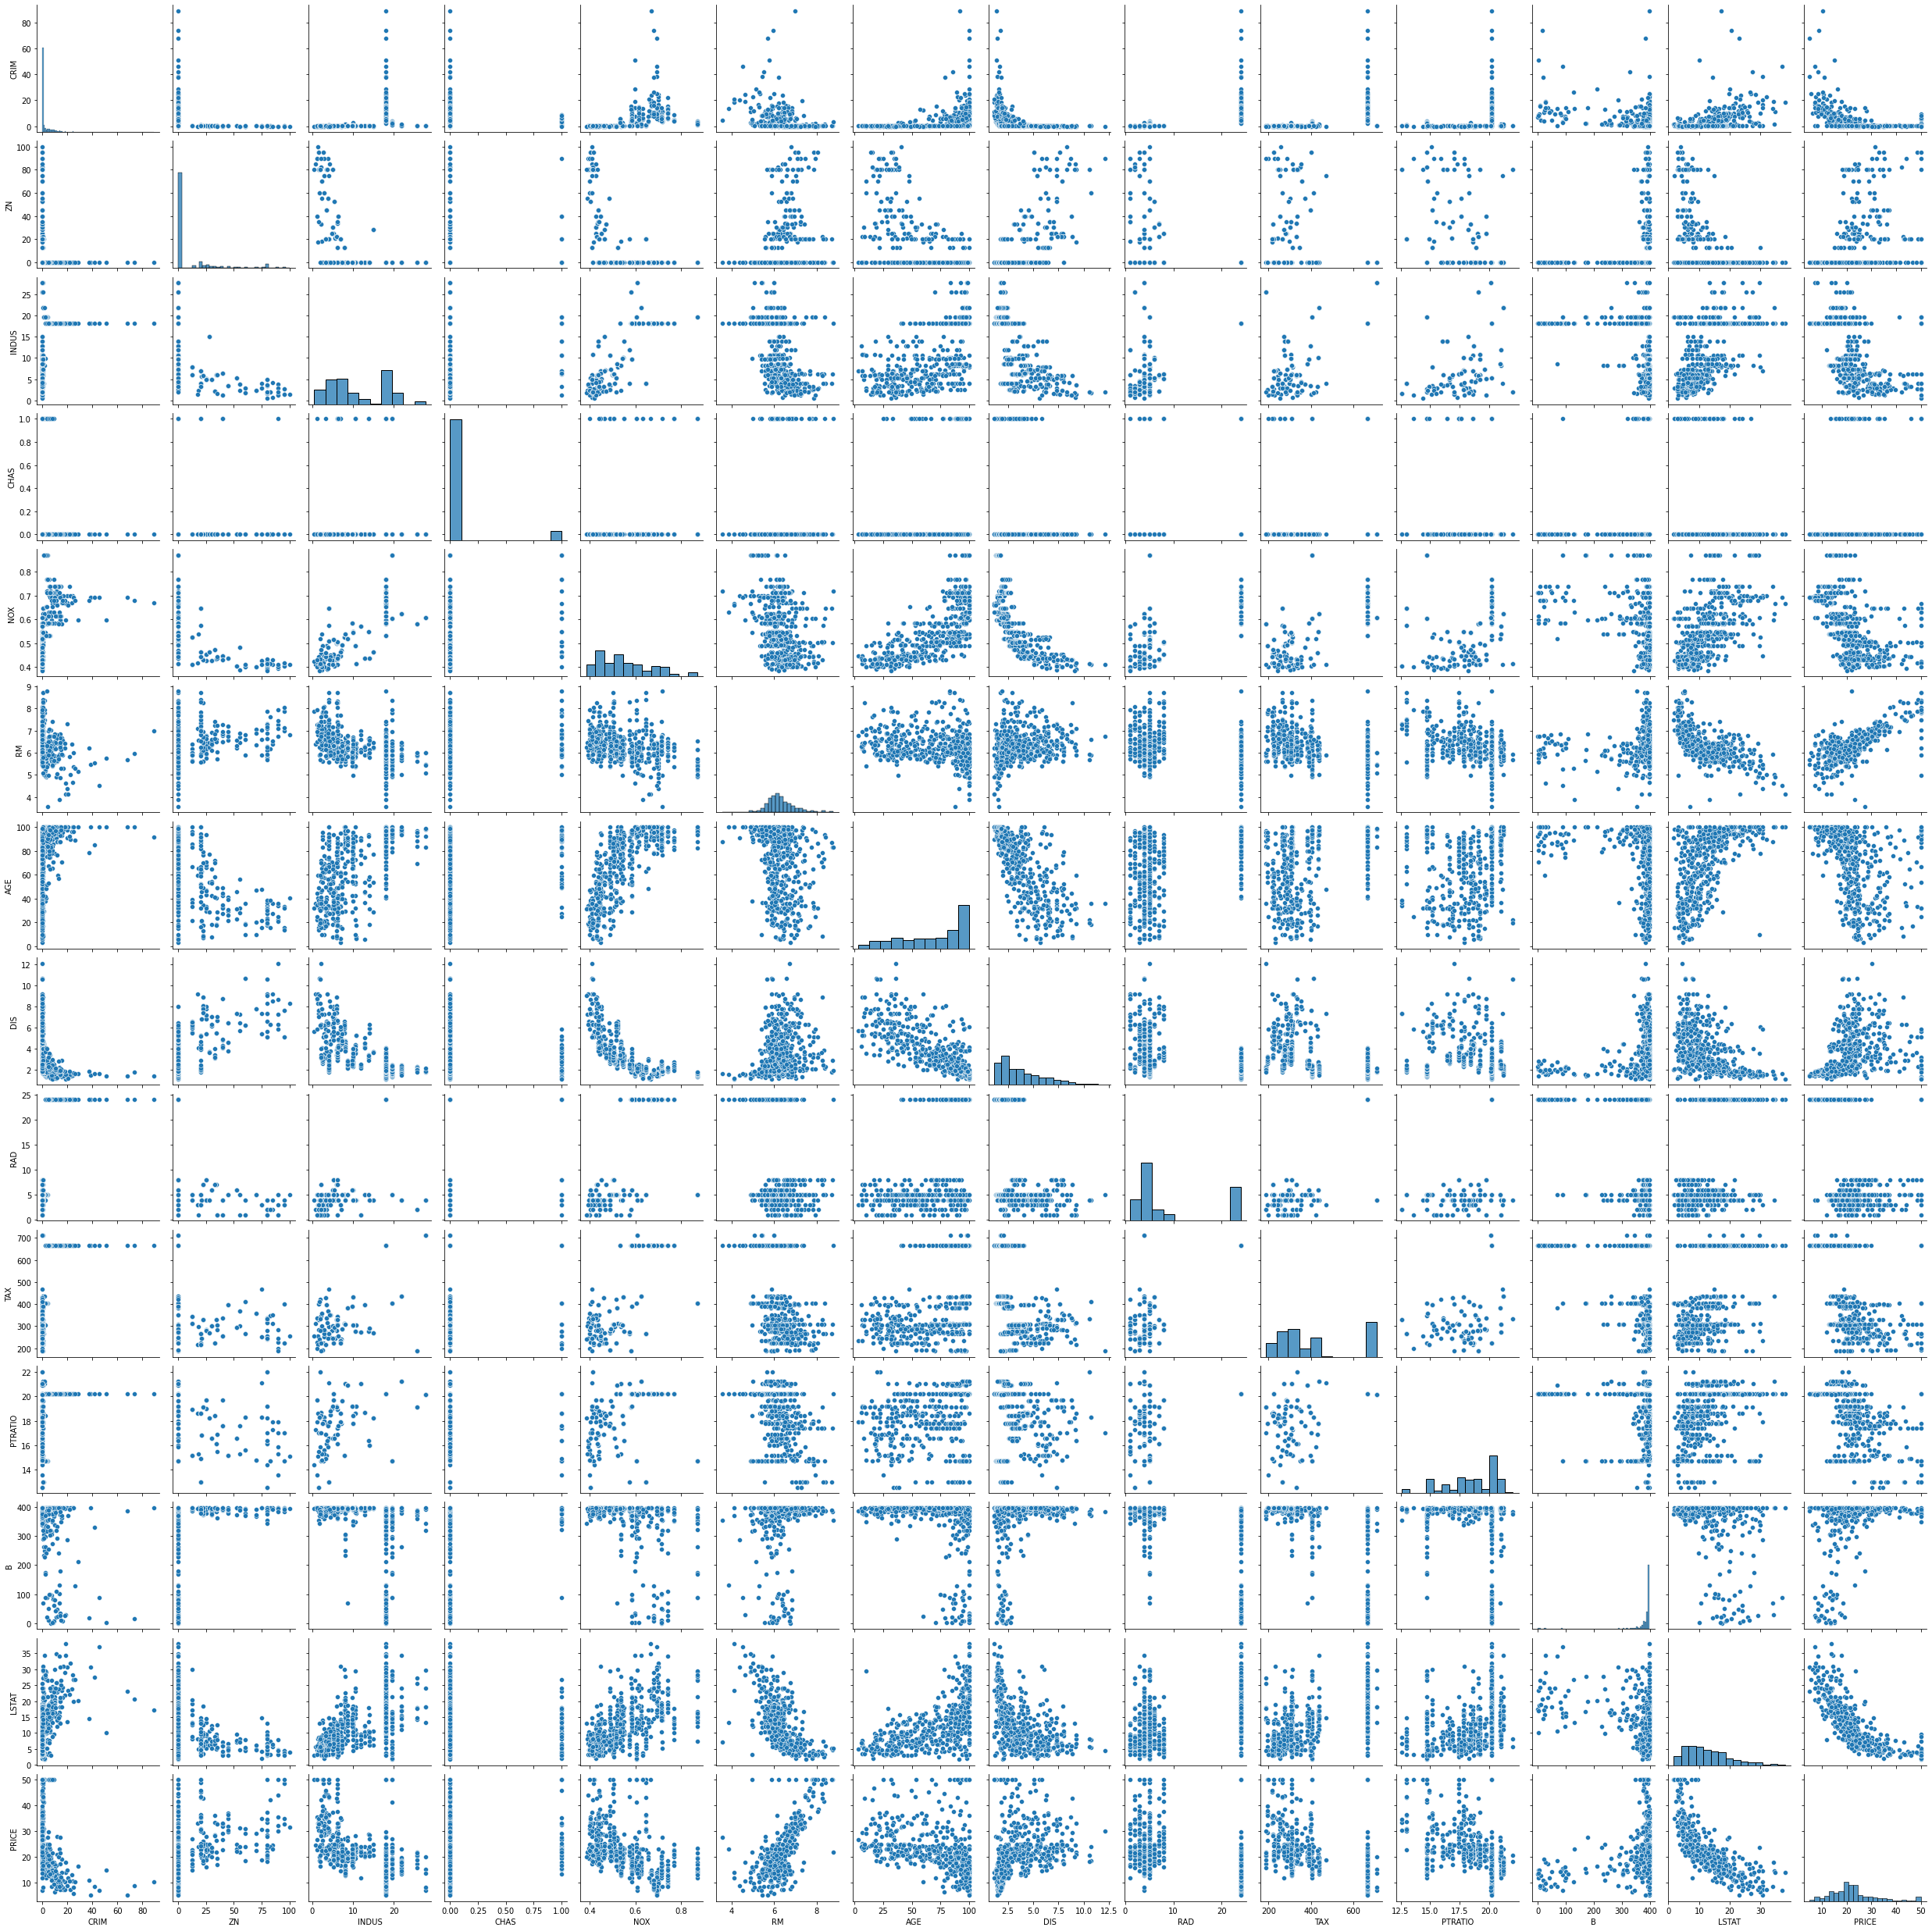

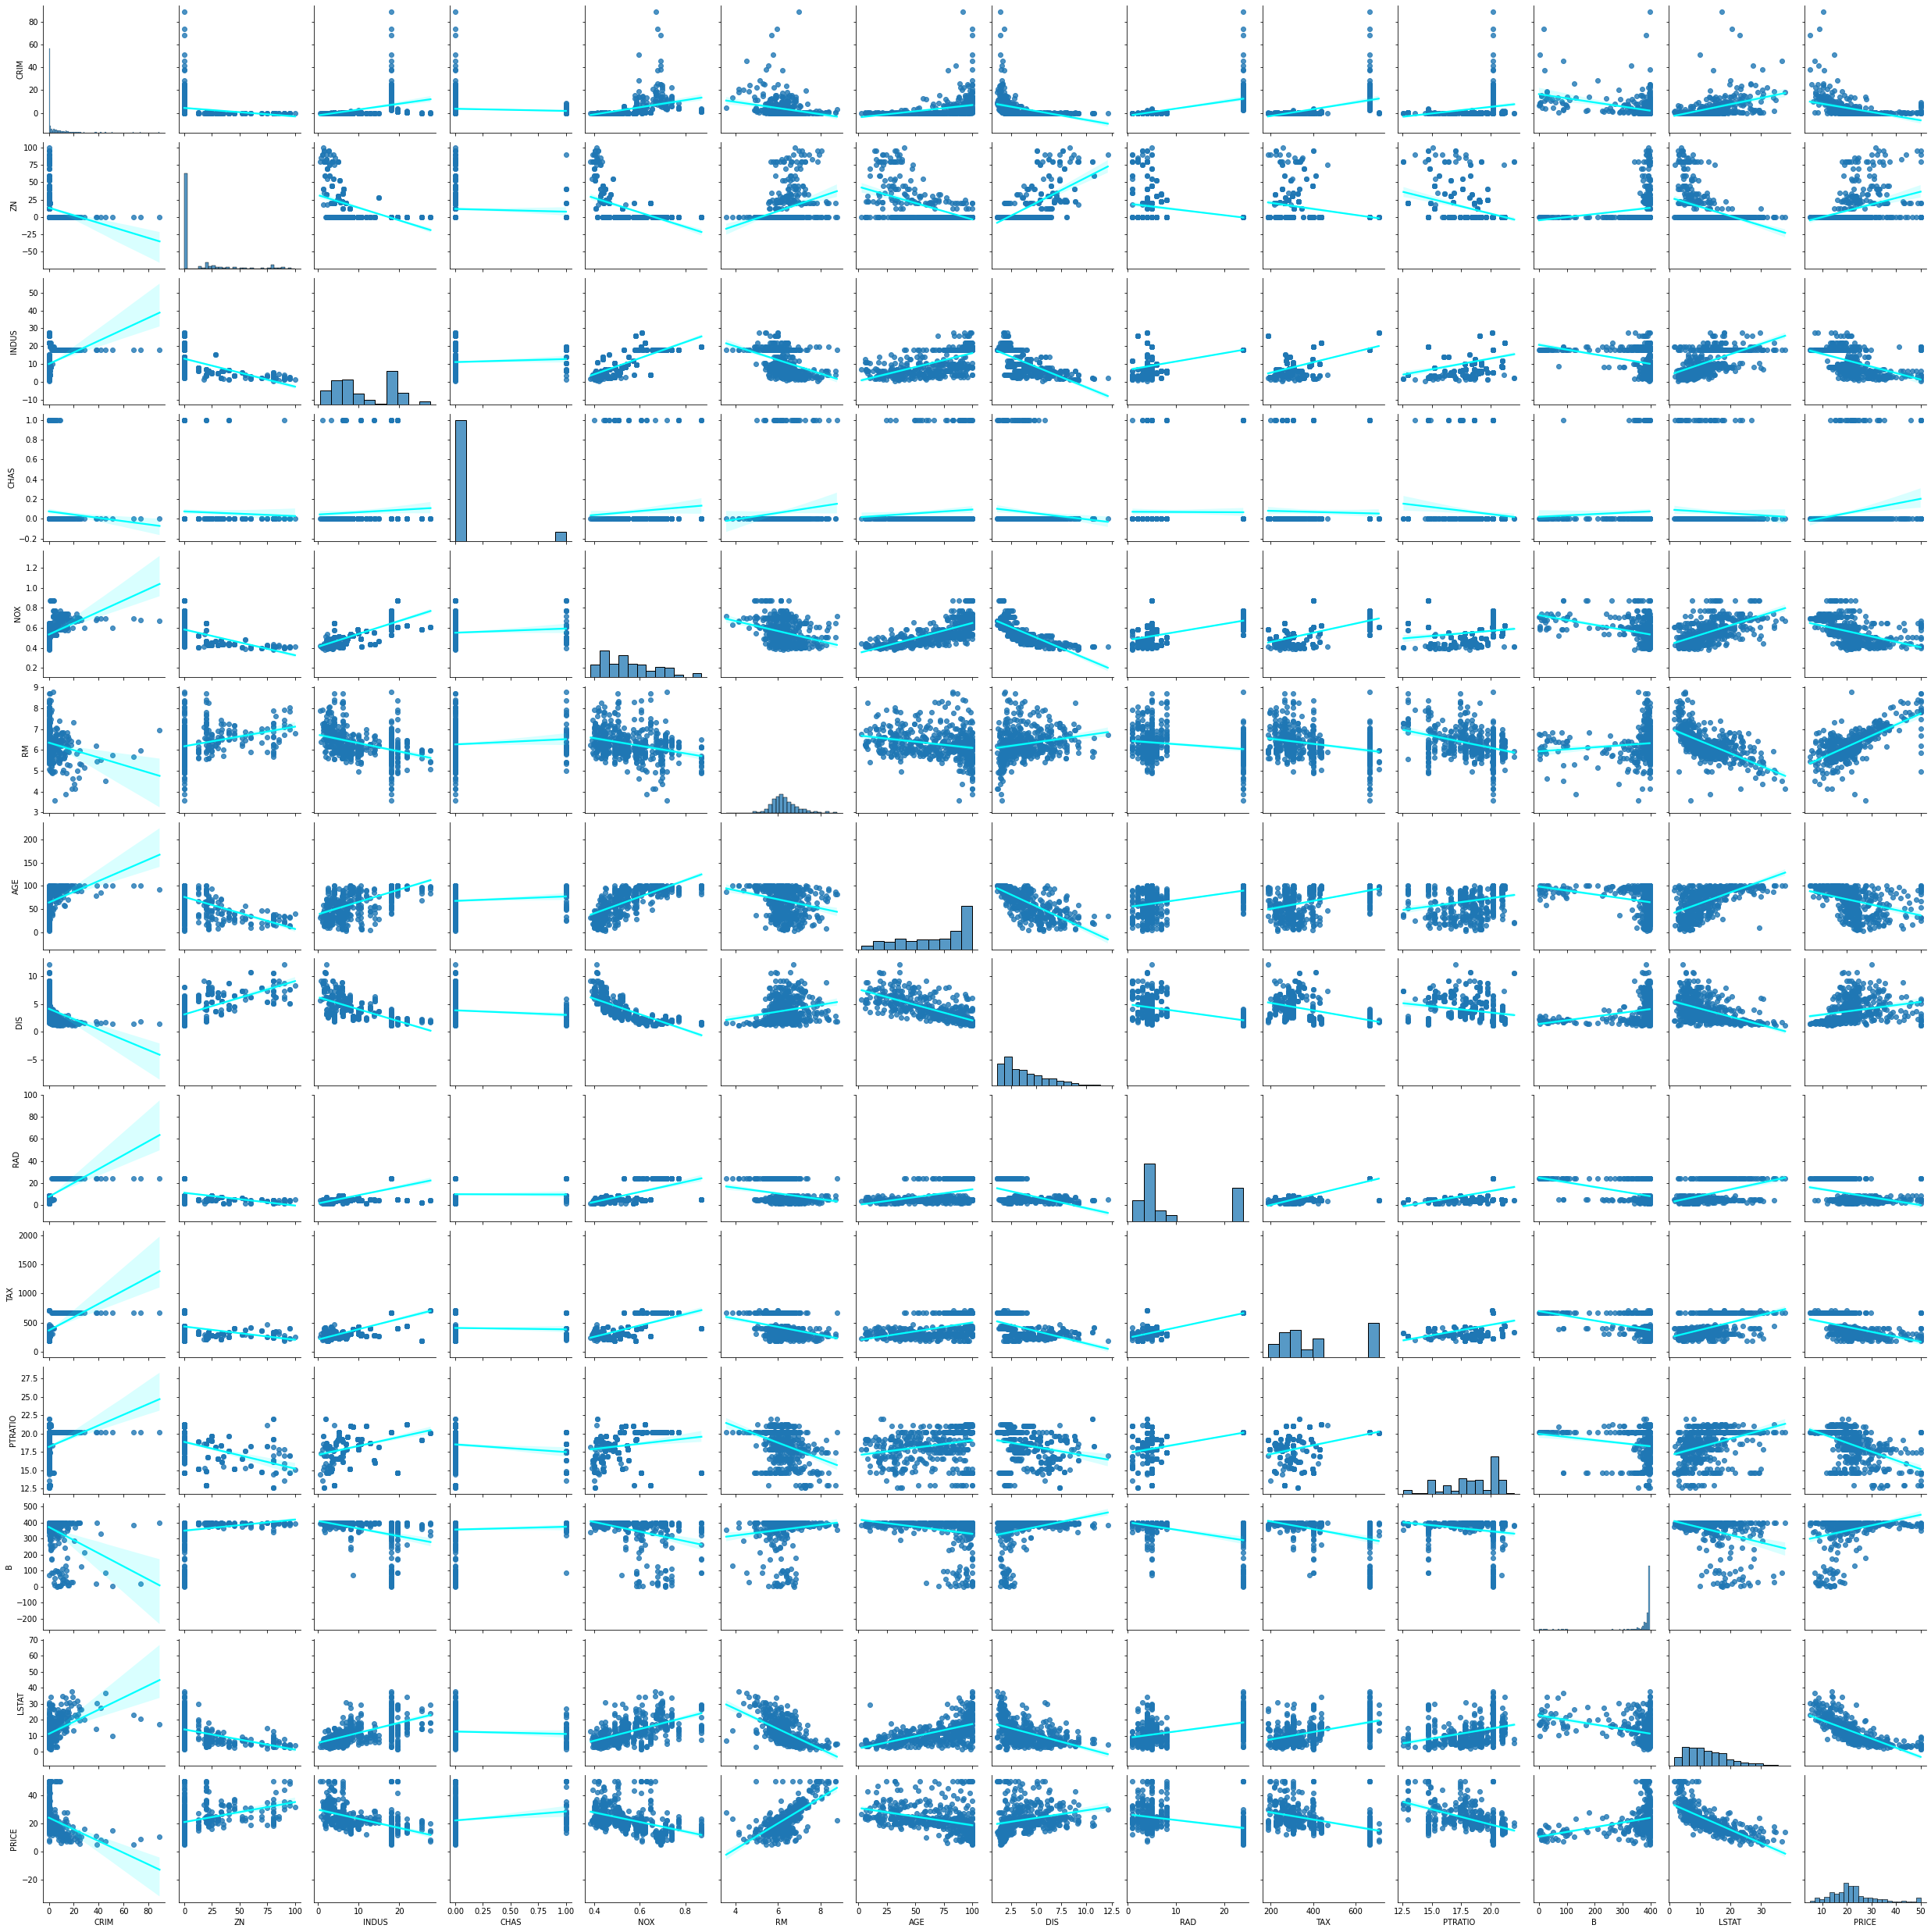

In [29]:
sns.pairplot(data)

# adding regression line
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})

plt.show()

**Comment:**
>We see that we get back a grid. You might have to zoom in or squint a bit, but there are scatterplots between all the columns in our dataset. And down the diagonal in the middle, we get histograms for all our columns. 

Use [Seaborn's `.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to look at some of the relationships in more detail. Create a jointplot for:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE

#### Distance from Employment vs. Pollution 

Compare DIS (Distance from employment) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as the distance increases? 

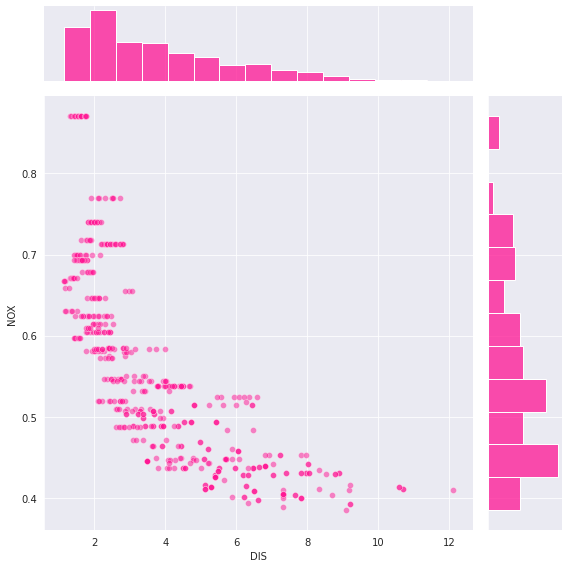

In [30]:
with sns.axes_style('darkgrid'):
  sns.jointplot(data=data, 
                x=data['DIS'], 
                y=data['NOX'],
                height=8,
                kind='scatter',
                color='deeppink',
                joint_kws={'alpha':0.5})
  
  plt.show()

**Comment:**
As we move out of town the pollution decreases, which is obvious, from 9 miles to 12 miles the level of pollution is same. Whereas, from 2 miles distance to employment centers there is a different level of pollution.

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution 

Compare INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as there is a higher proportion of industry?

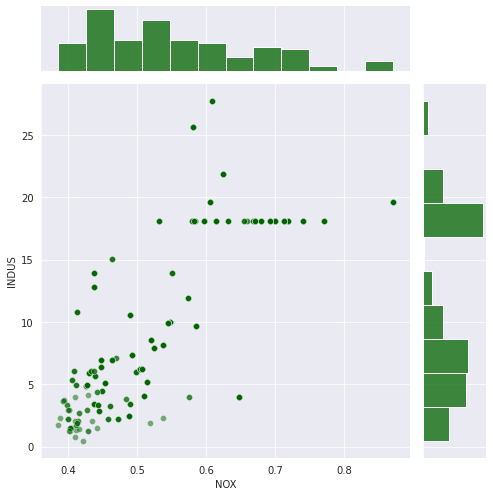

In [31]:
with sns.axes_style('darkgrid'):
  sns.jointplot(data=data, 
                x=data['NOX'], 
                y=data['INDUS'],
                height=7,
                # kind='scatter',
                color='darkgreen',
                joint_kws={'alpha':0.5})
  
  plt.show()

**Comment:**
Areas with high proportions of industry, releases more pollution.

#### % of Lower Income Population vs Average Number of Rooms

Compare LSTAT (proportion of lower-income population) with RM (number of rooms) using Seaborn's `.jointplot()`. How does the number of rooms per dwelling vary with the poverty of area? Do homes have more or fewer rooms when LSTAT is low?

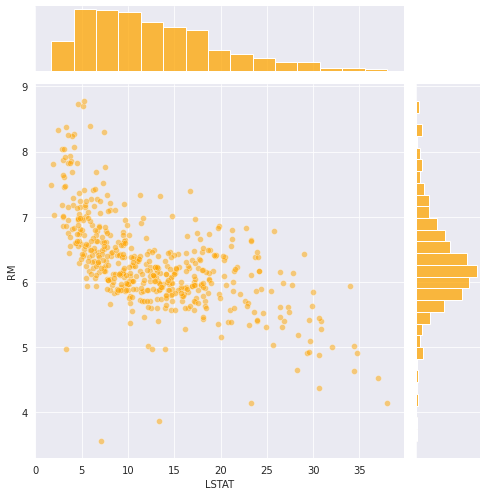

In [32]:
with sns.axes_style('darkgrid'):
  sns.jointplot(data=data, 
                x=data['LSTAT'], 
                y=data['RM'],
                height=7,
                # kind='scatter',
                color='orange',
                joint_kws={'alpha':0.5})
  
  plt.show()

**Comment:**
In the top left corner where we have the homes with rooms 8 or more, LSTAT is well below 10%

#### % of Lower Income Population versus Home Price

Compare LSTAT with PRICE using Seaborn's `.jointplot()`. How does the proportion of the lower-income population in an area affect home prices?

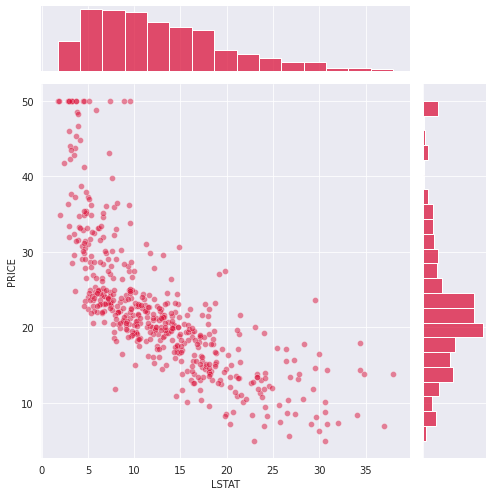

In [33]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data.LSTAT, 
                y=data.PRICE, 
                # kind='hex', 
                height=7, 
                color='crimson',
                joint_kws={'alpha':0.5})
plt.show()

**Comment:**
The proportion of the lower income population in an area have high home prices as they low-income population in big, which increases the demand of these houses.

#### Number of Rooms versus Home Value

Compare RM (number of rooms) with PRICE using Seaborn's `.jointplot()`. You can probably guess how the number of rooms affects home prices. 😊 

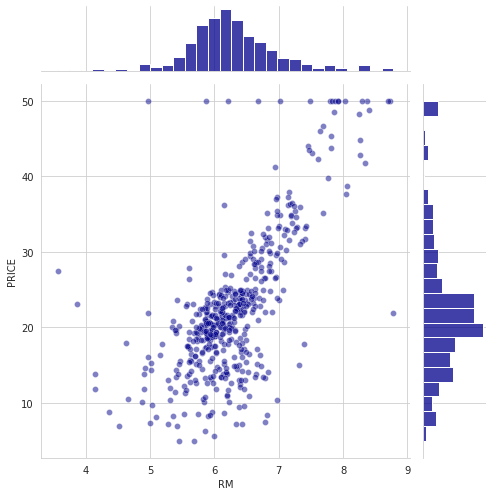

In [34]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x=data.RM, 
                y=data.PRICE, 
                height=7, 
                color='darkblue',
                joint_kws={'alpha':0.5})
plt.show()


**Comment:**
Usually, the prices and the number of rooms would have linear relation, but there is a clutter around $60,000 and below $50,000 there are very few. This shows the signs of price control as sort of cap or maximum value imposed during data collection.

# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world. 

In [35]:
# since our target is Price, and the rest of the features(columns) will play a role in predicting it
target = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, # telling model what to use for prediction
                                                    target, # telling model what to predict
                                                    test_size=0.2, # will select 20% from original data for testing
                                                    random_state=10, # will take 10 random rows from data
                                                    )

In [37]:
# % of training data
train_pct = (len(X_train)/len(features))*100
print(f"Training data is {train_pct:.4}% of the total data")

# % of testing data
test_pct = (len(X_test)/len(features))*100
print(f"Test data is {test_pct:.4}% of the total data")

Training data is 79.84% of the total data
Test data is 20.16% of the total data


# Multivariable Regression
Our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run Your Regression

Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [38]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(f"The slopes of the best-fit {regressor.coef_}") # it gives us the slope, which is co_effiecient of x
print(f"The intercept of the best-fit {regressor.intercept_}") # it gives us the the y-intercept


The slopes of the best-fit [-1.28180656e-01  6.31981786e-02 -7.57627602e-03  1.97451452e+00
 -1.62719890e+01  3.10845625e+00  1.62922153e-02 -1.48301360e+00
  3.03988206e-01 -1.20820710e-02 -8.20305699e-01  1.14189890e-02
 -5.81626431e-01]
The intercept of the best-fit 36.533051382824596


In [39]:
rsquared = regressor.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.75


**Comment:**
R-squared value, determines the proportion of variance in the dependent variable that can be explained by independent variable.  R-squared shows how well the data fit the regression model. (The wellness of fit)

0.75 is a very high value of R-squared.

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 


In [40]:
# checking the co-efficients of all the features
regression_coef = pd.DataFrame(data=regressor.coef_, index=X_train.columns, columns=['Coefficient'])
regression_coef

,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


**Comment:**
The positive and Negative signs of the Co-efficient shows the relation of each columns(features) with price_column(target), this relation is in accordance with scatter plots above.

In [41]:
# premium for extra room
premium = regression_coef.loc['RM'].values[0] *1000
print(f"The premium price for having an extra room is ${premium:.5}")

The premium price for having an extra room is $3108.5


### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`. 


In [42]:
predicted_values = regressor.predict(X_train)
residuals = (y_train - predicted_values)

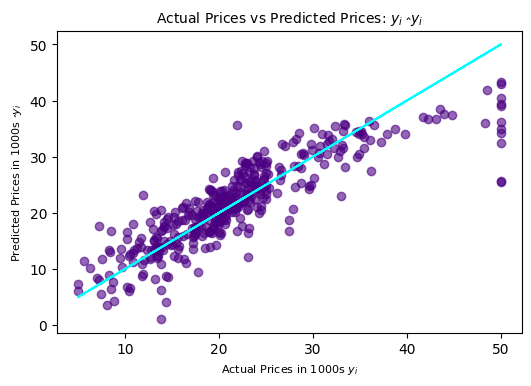

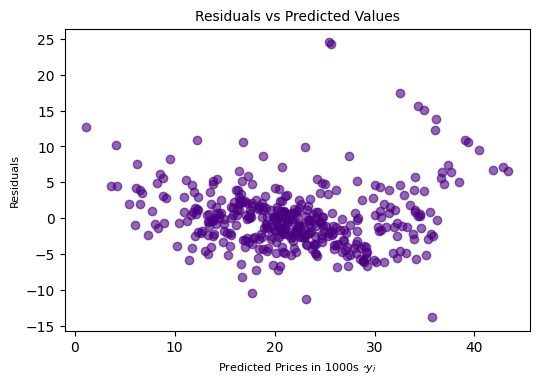

In [43]:
# Original Regression of Actual vs Predicted Values
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_values, color="indigo", alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f"Actual Prices vs Predicted Prices: $y _i$ $\hat y_i$", fontsize=10)
plt.xlabel(f"Actual Prices in 1000s $y _i$", fontsize=8)
plt.ylabel(f"Predicted Prices in 1000s $\hat y _i$", fontsize=8)
plt.show()

# Residuals vs Predicted Values
plt.figure(dpi=100)
plt.scatter(x=predicted_values, y=residuals, color="indigo", alpha=0.6)
plt.title(f"Residuals vs Predicted Values", fontsize=10)
plt.xlabel(f"Predicted Prices in 1000s $\hat y _i$", fontsize=8)
plt.ylabel(f"Residuals", fontsize=8)
plt.show()

**Comment:**
Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like: 

<img src=https://i.imgur.com/7QBqDtO.png height=400>

In [44]:
print(f"The mean of the Residuals is {round(residuals.mean(), 2)}")
print(f"The skew of the Residuals is {round(residuals.skew(), 2)}")

The mean of the Residuals is -0.0
The skew of the Residuals is 1.46


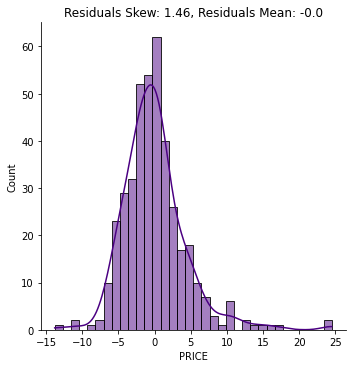

In [45]:
# Residual Distribution Chart
sns.displot(residuals, kde=True, color='indigo')
plt.title(f"Residuals Skew: {round(residuals.skew(), 2)}, Residuals Mean: {round(residuals.mean(), 2)}")
plt.show()

**Comment:**
The Residuals have skewness of 1.46, means this fit needs improvement. This shows the outliers of the distribution are further-out towards the right, and closer to the mean on the left.

Skewness: tells the direction of outliers

### Data Transformations for a Better Fit

We have two options at this point: 

1. Change our model entirely. Perhaps a linear model is not appropriate. 
2. Transform our data to make it fit better with our linear model. 

Let's try a data transformation approach. 

In [46]:
log_price = np.log(data['PRICE'])
log_price

0     3.18
1     3.07
2     3.55
3     3.51
4     3.59
      ... 
501   3.11
502   3.03
503   3.17
504   3.09
505   2.48
Name: PRICE, Length: 506, dtype: float64

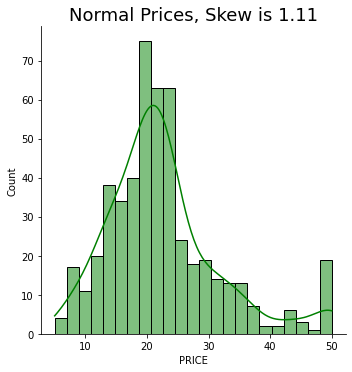

In [47]:
# Actual price plot
sns.displot(data['PRICE'], kde=True, color='green')
plt.title(f"Normal Prices, Skew is {round(data['PRICE'].skew(), 2)}", fontsize=18)
plt.show()

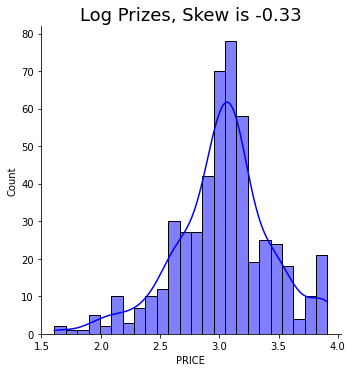

In [48]:
# Log_price plot
sns.displot(log_price, kde=True, color='blue')
plt.title(f"Log Prizes, Skew is {round(log_price.skew(), 2)}", fontsize=18)
plt.show()

**Comment:**
The log prices have a skew that's closer to zero. This makes them a good candidate for use in our linear model. Perhaps using log prices will improve our regression's r-squared and our model's residuals. 

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. Here's how the prices are "compressed" by the log transformation:

<img src=https://i.imgur.com/TH8sK1Q.png height=200>

We can see this when we plot the actual prices against the (transformed) log prices. 

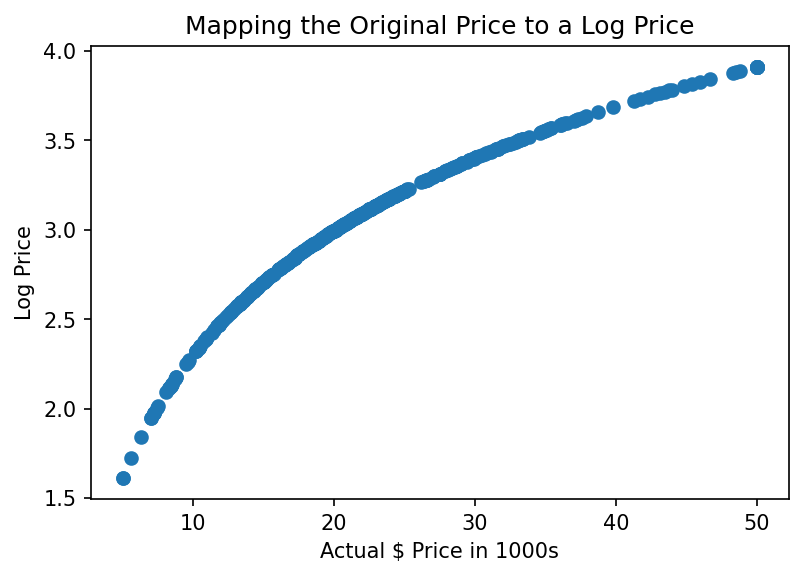

In [49]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 1000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

In [50]:
# since our target is Log Price, and the rest of the features(columns) will play a role in predicting it
log_target = log_price
log_features = data.drop('PRICE', axis=1)

X1_train, X1_test, y1_train, y1_test = train_test_split(log_features, # telling model what to use for prediction
                                                    log_target, # telling model what to predict
                                                    test_size=0.2, # will select 20% from original data for testing
                                                    random_state=10, # will take 10 random rows from data
                                                    )

second_regressor = LinearRegression()
second_regressor.fit(X1_train, y1_train)

log_rsquared = second_regressor.score(X1_train, y1_train)

log_predictions = second_regressor.predict(X1_train)
log_residuals = (y1_train - log_predictions)

print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.79


**Comment:**The r-squared was 0.75, and now we got 0.79 which is an improvement. So the Log prices is working better than Normal prices.

## Evaluating Coefficients with Log Prices

In [51]:
log_df_coef = pd.DataFrame(data=second_regressor.coef_, index=X1_train.columns, columns=['Coefficient'])
log_df_coef

,Coefficient
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


**Comment:**The key thing we look for is still the sign - being close to the river results in higher property prices because CHAS has a coefficient greater than zero. Therefore property prices are higher next to the river. 

More students per teacher - a higher PTRATIO - is a clear negative. Smaller classroom sizes are indicative of higher quality education, so have a negative coefficient for PTRATIO.

## Regression with Log Prices & Residual Plots


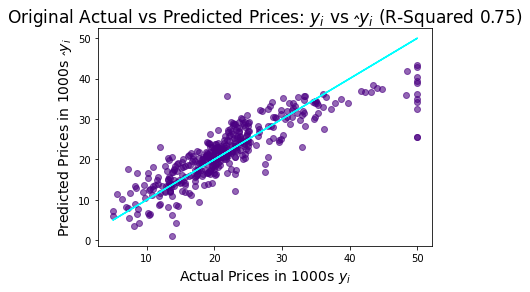

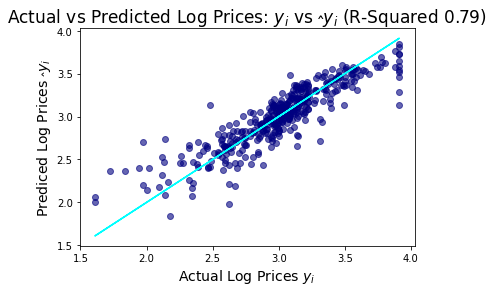

In [52]:
# Original Regression of Actual vs Predicted Values
plt.scatter(x=y_train, y=predicted_values, color="indigo", alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-Squared {rsquared:.3})', fontsize=17)
plt.xlabel(f"Actual Prices in 1000s $y _i$", fontsize=14)
plt.ylabel(f"Predicted Prices in 1000s $\hat y _i$", fontsize=14)
plt.show()

# Regression of Log Prizes vs Log Predicted Values
plt.scatter(x=y1_train, y=log_predictions, color="navy", alpha=0.6)
plt.plot(y1_train, y1_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Prediced Log Prices $\hat y _i$', fontsize=14)
plt.show()

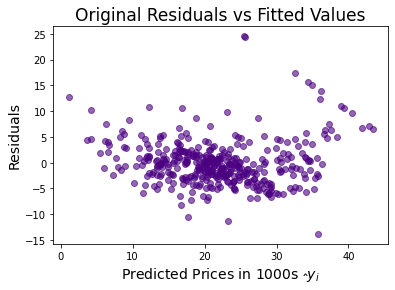

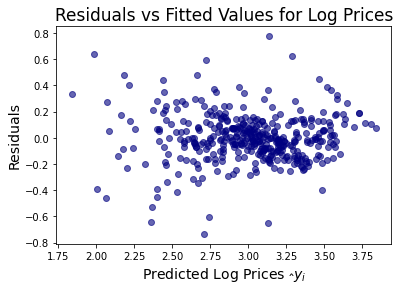

In [53]:
# Residuals vs Predicted Values
plt.scatter(x=predicted_values, y=residuals, color="indigo", alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel(f"Predicted Prices in 1000s $\hat y _i$", fontsize=14)
plt.ylabel(f"Residuals", fontsize=14)
plt.show()

# Residuals vs Predicted Values
plt.scatter(x=log_predictions, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values for Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

Are the mean and skew closer to 0 for the regression using log prices?

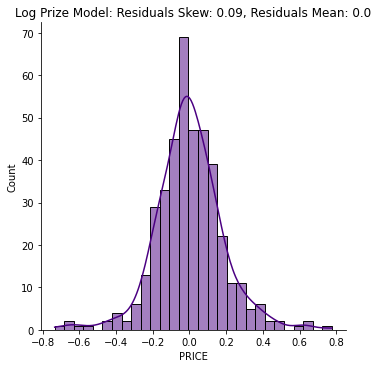

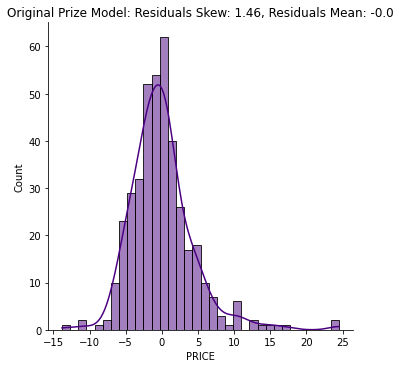

In [54]:
# Log Residual Distribution Chart
sns.displot(log_residuals, kde=True, color='indigo')
plt.title(f"Log Prize Model: Residuals Skew: {round(log_residuals.skew(), 2)}, Residuals Mean: {round(log_residuals.mean(), 2)}")
plt.show()

# Original Residual Distribution Chart
sns.displot(residuals, kde=True, color='indigo')
plt.title(f"Original Prize Model: Residuals Skew: {round(residuals.skew(), 2)}, Residuals Mean: {round(residuals.mean(), 2)}")
plt.show()

**Comment:**Our new regression residuals have a skew of 0.09 compared to a skew of 1.46. The mean is still around 0. From both a residuals perspective and an r-squared perspective we have improved our model with the data transformation. 

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in. 


In [55]:
print(f'Original Model Test Data r-squared: {regressor.score(X_test, y_test):.2}')
print(f'Log Model Test Data r-squared: {second_regressor.score(X1_test, y1_test):.2}')

Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


**Comment:**By definition, the model has not been optimised for the testing data. Therefore performance will be worse than on the training data. However, our r-squared still remains high, so we have built a useful model. 

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [60]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


In [64]:
# Making Prediction
log_estimate = second_regressor.predict(property_stats)[0]
print(f"The log price estimate is ${log_estimate:.3}")

# changing log prices to Actual values in $
dollar_estimate = np.exp(log_estimate)*1000
print(f"The property is estimated to be worth ${dollar_estimate:.6}")

The log price estimate is $3.03
The property is estimated to be worth $20703.2


A property with an average value for all the features has a value of $20,700. 

Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [57]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20 
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [65]:
# Setting Property Characteristics
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
    property_stats['CHAS'] = 1
else:
    property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [66]:
# Making Prediction
log_estimate = second_regressor.predict(property_stats)[0]
print(f"The log price estimate is ${log_estimate:.3}")

# changing log prices to Actual values in $
dollar_estimate = np.exp(log_estimate)*1000
print(f"The property is estimated to be worth ${dollar_estimate:.6}")

The log price estimate is $3.25
The property is estimated to be worth $25792.0
